In [199]:
#Pranav Yalamala
#I pledge my honor that I have abided by the Stevens Honors System
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [213]:
class LogisticRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        for i in range(self.iterations):
            self.update_weights()
        return self
    def update_weights(self):
        A = 1 / (1 + np.exp(self.X.dot(self.W) + self.b))
        tmp = (A - self.Y.T)
        tmp = np.reshape(tmp, self.m)
        dW = np.dot(self.X.T, tmp) / self.m
        db = np.sum(tmp) / self.m
        
        self.W = self.W = self.learning_rate *dW
        self.b = self.b = self.learning_rate *db
        
        return self
    
    def predict(self, X):
        Z = 1 / (1 + np.exp(-(X.dot(self.W) + self.b)))
        Y = np.where(Z > .5, 1, 0)
        return Y

In [214]:
df = pd.read_csv("diabetes.csv")
xfeatures = pd.DataFrame(df, columns= ['Glucose', 'BMI'])
target = pd.DataFrame(df, columns = ['Outcome'])
xfeatures = xfeatures.to_numpy()
target = target.to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(xfeatures, target, test_size = .2)

model = LogisticRegression(learning_rate = .01, iterations = 2000)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

correct = 0

count = 0
for count in range(np.size(Y_pred)):
    if Y_test[count] == Y_pred[count]:
        correct += 1
    count += 1
print("Accuracy: ", (correct / count)*100, "%")

Accuracy:  66.88311688311688 %


<function matplotlib.pyplot.show(close=None, block=None)>

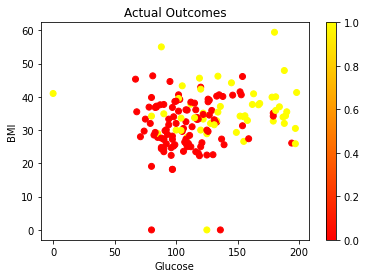

In [215]:

plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, cmap=plt.cm.autumn)
plt.title("Actual Outcomes")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.colorbar()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

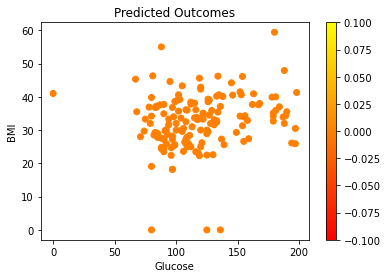

In [216]:
plt.scatter(X_test[:,0], X_test[:,1], c=Y_pred, cmap=plt.cm.autumn)
plt.title("Predicted Outcomes")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.colorbar()
plt.show